In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers, optimizers

D:\XUEXI\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\XUEXI\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\XUEXI\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\XUEXI\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\frame

In [3]:
# 加载数据集
mnist = tf.keras.datasets.mnist
(trainImage, trainLabel), (testImage, testLabel) = mnist.load_data()

for i in [trainImage, trainLabel, testImage, testLabel]:
    print(i.shape)

trainImage = np.array(trainImage).reshape(60000, 28, 28, 1)  # train的时候，再划分一部分为验证集
testImage = np.array(testImage).reshape(10000, 28, 28, 1)  # train 的时候不用，test用

for i in [trainImage, trainLabel, testImage, testLabel]:
    print(i.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [3]:
# 网络定义
network = Sequential([
    # 卷积层1
    layers.Conv2D(filters=6, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1), padding="same"),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),

    # 卷积层2
    layers.Conv2D(filters=16, kernel_size=(5, 5), activation="relu", padding="same"),
    layers.MaxPool2D(pool_size=2, strides=2),

    # 卷积层3
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", padding="same"),

    layers.Flatten(),

    # 全连接层1
    layers.Dense(200, activation="relu"),

    # 全连接层2
    layers.Dense(10, activation="softmax")
])
network.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          12832     
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
____

In [4]:
# 模型训练 训练30个epoch
network.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
network.fit(trainImage, trainLabel, epochs=30, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 8s 143us/sample - loss: 0.2285 - acc: 0.9474 - val_loss: 0.0588 - val_acc: 0.9805
Epoch 2/30
54000/54000 [==============================] - 6s 110us/sample - loss: 0.0642 - acc: 0.9799 - val_loss: 0.0574 - val_acc: 0.9837
Epoch 3/30
54000/54000 [==============================] - 7s 126us/sample - loss: 0.0536 - acc: 0.9831 - val_loss: 0.0453 - val_acc: 0.9878
Epoch 4/30
54000/54000 [==============================] - 5s 95us/sample - loss: 0.0509 - acc: 0.9847 - val_loss: 0.0700 - val_acc: 0.9790
Epoch 5/30
54000/54000 [==============================] - 5s 93us/sample - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0677 - val_acc: 0.9818
Epoch 6/30
54000/54000 [==============================] - 5s 93us/sample - loss: 0.0418 - acc: 0.9878 - val_loss: 0.0498 - val_acc: 0.9865
Epoch 7/30
54000/54000 [==============================] - 5s 96us/sample - loss: 0.0362 - acc: 0.9891 - val_loss: 

In [5]:
# 模型保存
network.save('./lenet_mnist.h5')
print('lenet_mnist model saved')
del network

lenet_mnist model saved


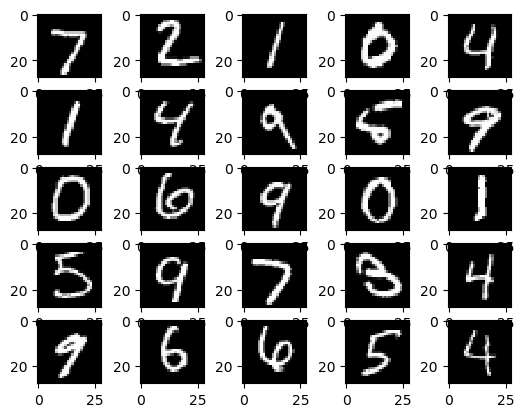

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4]


In [10]:
import matplotlib.pyplot as plt
from tensorflow import keras
# 网络加载
network = keras.models.load_model('lenet_mnist.h5')
# 显示前25张图片
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(testImage[i].squeeze(), cmap='gray')
plt.show()
# 改变维度
# testImage = np.array(testImage).reshape(10000, 28, 28, 1)
# 结果预测
result = network.predict(testImage)[0:25]
pred = np.argmax(result, axis=1)
pred_list = []
for item in pred:
    pred_list.append(item)
print(pred_list)